In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

deliveries_matches = deliveries.merge(matches, how='left', on='id')
kane_richardson_bowling = deliveries_matches[deliveries_matches['bowler'].str.startswith('KW Richardson')]
dan_christian_bowling = deliveries_matches[deliveries_matches['bowler'].str.startswith('DT Christian')]



In [3]:
dan_christian_bowling

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
41943,501199,2,8,1,J Botha,R Dravid,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41944,501199,2,8,2,R Dravid,J Botha,DT Christian,2,0,2,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41945,501199,2,8,3,R Dravid,J Botha,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41946,501199,2,8,4,J Botha,R Dravid,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41947,501199,2,8,5,R Dravid,J Botha,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158907,1136596,2,19,5,KS Williamson,YK Pathan,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158908,1136596,2,14,5,MK Pandey,KS Williamson,DT Christian,4,0,4,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158909,1136596,2,14,6,MK Pandey,KS Williamson,DT Christian,4,0,4,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158910,1136596,2,14,3,MK Pandey,KS Williamson,DT Christian,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan


In [4]:
dan_christian_bowling.ball = 1

In [6]:
dan_christian_bowling_per_over = dan_christian_bowling.groupby(by='over').sum()
dan_christian_bowling_per_over

,id,inning,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin
over,,,,,,,,,,
0,4009912,8,8,9,2,11,0,0,0,160.0
1,18263458,46,26,32,2,34,0,0,0,270.0
2,3290196,12,6,4,0,4,0,1,0,24.0
3,16380708,48,24,43,0,43,0,0,0,126.0
4,38189136,120,66,58,9,67,0,3,0,728.0
5,41131927,84,58,78,4,82,0,4,0,1210.0
6,30568521,90,51,43,3,46,0,0,0,1153.0
7,39423498,66,42,33,0,33,0,1,0,426.0
8,42247940,111,68,92,4,96,0,0,0,1086.0


In [7]:
kane_richardson_bowling.ball = 1
kane_richardson_bowling_per_over = kane_richardson_bowling.groupby(by='over').sum()
kane_richardson_bowling_per_over

,id,inning,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin
over,,,,,,,,,,
0,19798683,32,25,23,1,24,0,0,7,361.0
1,35129715,67,43,33,1,34,0,3,13,310.0
2,16771986,24,24,17,0,17,0,4,6,480.0
3,29807331,61,37,32,1,33,0,2,6,339.0
4,17444799,31,25,41,1,42,0,0,19,328.0
5,10454889,26,13,31,5,36,0,1,0,72.0
6,4375830,6,6,4,0,4,0,0,6,36.0
11,15646239,26,19,17,1,18,0,0,6,120.0
13,12150359,32,19,24,1,25,0,1,6,299.0


In [8]:
kane_richardson_bowling_per_over['Average'] = kane_richardson_bowling_per_over['batsman_runs']/kane_richardson_bowling_per_over['is_wicket']
kane_richardson_bowling_per_over['Economy Rate'] = kane_richardson_bowling_per_over['batsman_runs']/kane_richardson_bowling_per_over['ball']*6
kane_richardson_bowling_per_over['Strike Rate'] = kane_richardson_bowling_per_over['ball']/kane_richardson_bowling_per_over['is_wicket']
kane_richardson_bowling_per_over

,id,inning,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Economy Rate,Strike Rate
over,,,,,,,,,,,,,
0,19798683,32,25,23,1,24,0,0,7,361.0,inf,5.520000,inf
1,35129715,67,43,33,1,34,0,3,13,310.0,11.00,4.604651,14.333333
2,16771986,24,24,17,0,17,0,4,6,480.0,4.25,4.250000,6.000000
3,29807331,61,37,32,1,33,0,2,6,339.0,16.00,5.189189,18.500000
4,17444799,31,25,41,1,42,0,0,19,328.0,inf,9.840000,inf
5,10454889,26,13,31,5,36,0,1,0,72.0,31.00,14.307692,13.000000
6,4375830,6,6,4,0,4,0,0,6,36.0,inf,4.000000,inf
11,15646239,26,19,17,1,18,0,0,6,120.0,inf,5.368421,inf
13,12150359,32,19,24,1,25,0,1,6,299.0,24.00,7.578947,19.000000


In [19]:
dan_christian_bowling_per_over['Average'] = dan_christian_bowling_per_over['batsman_runs']/dan_christian_bowling_per_over['is_wicket']
dan_christian_bowling_per_over['Economy Rate'] = dan_christian_bowling_per_over['batsman_runs']/dan_christian_bowling_per_over['ball']*6
dan_christian_bowling_per_over['Strike Rate'] = dan_christian_bowling_per_over['ball']/dan_christian_bowling_per_over['is_wicket']
dan_christian_bowling_per_over

,id,inning,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Economy Rate,Strike Rate
over,,,,,,,,,,,,,
0,4009912,8,8,9,2,11,0,0,0,160.0,inf,6.750000,inf
1,18263458,46,26,32,2,34,0,0,0,270.0,inf,7.384615,inf
2,3290196,12,6,4,0,4,0,1,0,24.0,4.000000,4.000000,6.000000
3,16380708,48,24,43,0,43,0,0,0,126.0,inf,10.750000,inf
4,38189136,120,66,58,9,67,0,3,0,728.0,19.333333,5.272727,22.000000
5,41131927,84,58,78,4,82,0,4,0,1210.0,19.500000,8.068966,14.500000
6,30568521,90,51,43,3,46,0,0,0,1153.0,inf,5.058824,inf
7,39423498,66,42,33,0,33,0,1,0,426.0,33.000000,4.714286,42.000000
8,42247940,111,68,92,4,96,0,0,0,1086.0,inf,8.117647,inf


In [47]:
kane_vs_dan_phase_wise = pd.DataFrame(columns=['bowler', 'phase', 'runs', 'wickets', 'balls', 'Average', 'Strike Rate', 'Economy Rate'])

In [48]:
kane_vs_dan_phase_wise['bowler'] = ['KW Richardson', 'KW Richardson', 'KW Richardson', 'Dan Christian', 'Dan Christian', 'Dan Christian']
kane_vs_dan_phase_wise['phase'] = ['Powerplay(1-6)', 'Middle Overs(7-16)', 'Death(17-20)', 'Powerplay(1-6)', 'Middle Overs(7-16)', 'Death(17-20)']
kane_vs_dan_phase_wise

,bowler,phase,runs,wickets,balls,Average,Strike Rate,Economy Rate
0,KW Richardson,Powerplay(1-6),NaN,NaN,NaN,NaN,NaN,NaN
1,KW Richardson,Middle Overs(7-16),NaN,NaN,NaN,NaN,NaN,NaN
2,KW Richardson,Death(17-20),NaN,NaN,NaN,NaN,NaN,NaN
3,Dan Christian,Powerplay(1-6),NaN,NaN,NaN,NaN,NaN,NaN
4,Dan Christian,Middle Overs(7-16),NaN,NaN,NaN,NaN,NaN,NaN
5,Dan Christian,Death(17-20),NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
kane_vs_dan_phase_wise['runs'] = [186, 97, 167, 241,515, 306]
kane_vs_dan_phase_wise['wickets'] = [10,1, 9,8,18, 10]
kane_vs_dan_phase_wise['balls'] = [167,68,91, 188, 433, 160]
kane_vs_dan_phase_wise['Average'] = [18.6, 97, 18.55, 30.12, 28.61, 30.6]
kane_vs_dan_phase_wise['Strike Rate'] = [16.7, 68, 10.11, 23.5, 24.05, 16]
kane_vs_dan_phase_wise['Economy Rate'] = [5.6, 8.55, 11.01, 7.69, 7.13, 11.47]

In [50]:
kane_vs_dan_phase_wise

,bowler,phase,runs,wickets,balls,Average,Strike Rate,Economy Rate
0,KW Richardson,Powerplay(1-6),186,10,167,18.60,16.70,5.60
1,KW Richardson,Middle Overs(7-16),97,1,68,97.00,68.00,8.55
2,KW Richardson,Death(17-20),167,9,91,18.55,10.11,11.01
3,Dan Christian,Powerplay(1-6),241,8,188,30.12,23.50,7.69
4,Dan Christian,Middle Overs(7-16),515,18,433,28.61,24.05,7.13
5,Dan Christian,Death(17-20),306,10,160,30.60,16.00,11.47


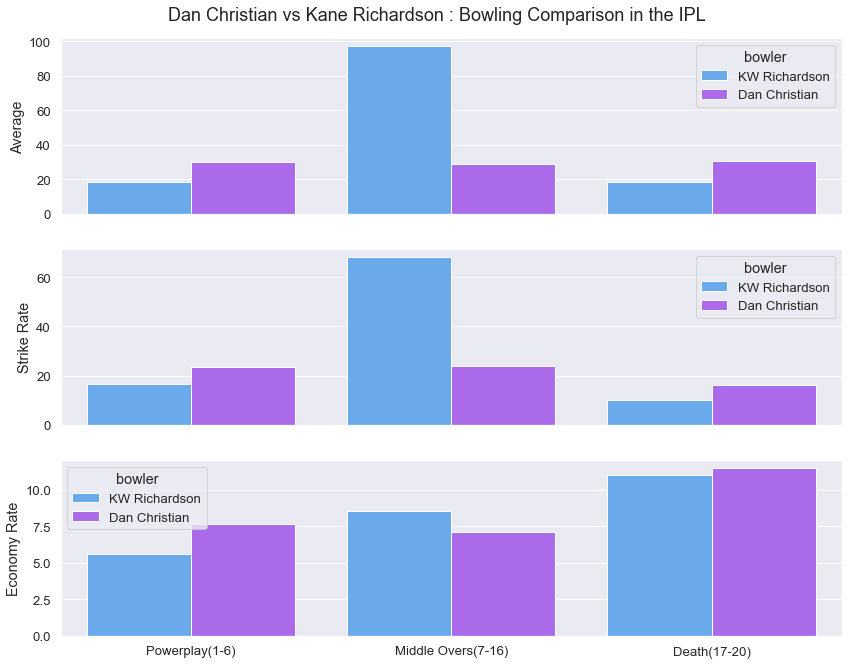

In [90]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(14,11), sharex=True)
sns.set(font_scale=1.2)
sns.barplot(x='phase', y='Average', hue='bowler', data=kane_vs_dan_phase_wise, ax=ax0, palette='cool').set(xlabel=None)
sns.barplot(x='phase', y='Strike Rate', hue='bowler', data=kane_vs_dan_phase_wise, ax=ax1, palette='cool').set(xlabel=None)
sns.barplot(x='phase', y='Economy Rate', hue='bowler', data=kane_vs_dan_phase_wise, ax=ax2, palette='cool').set(xlabel=None)
fig.suptitle("Dan Christian vs Kane Richardson : Bowling Comparison in the IPL ", y=0.92, fontsize=18);

In [91]:
dan_christian_batting = deliveries_matches[deliveries_matches['batsman'] == 'DT Christian']
dan_christian_batting

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
41857,501199,1,14,2,DT Christian,DB Ravi Teja,AL Menaria,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Rajasthan Royals,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41860,501199,1,14,5,DT Christian,DB Ravi Teja,AL Menaria,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Rajasthan Royals,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41862,501199,1,15,1,DT Christian,DB Ravi Teja,J Botha,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Rajasthan Royals,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41864,501199,1,15,3,DT Christian,DB Ravi Teja,J Botha,4,0,4,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Rajasthan Royals,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
41865,501199,1,15,4,DT Christian,DB Ravi Teja,J Botha,6,0,6,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Rajasthan Royals,Hyderabad,2011-04-09,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,RE Koertzen,SK Tarapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158809,1136596,1,17,5,DT Christian,V Shankar,Shakib Al Hasan,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158810,1136596,1,17,6,DT Christian,V Shankar,Shakib Al Hasan,2,0,2,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158812,1136596,1,18,2,DT Christian,V Shankar,S Kaul,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan
158815,1136596,1,18,5,DT Christian,V Shankar,S Kaul,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,2018-05-05,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN,BNJ Oxenford,CK Nandan


In [100]:
kane_richardson_batting = deliveries_matches[deliveries_matches['batsman'] == 'KW Richardson']
kane_richardson_batting.ball=1
kane_richardson_batting.ball.sum()

39

In [99]:
dan_christian_batting.ball.sum()

384

In [98]:
dan_christian_batting.ball=1

In [103]:
dan_christian_bowling.id.nunique()

40